In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Tires of Interest

In [2]:
round6_tires = {
# "hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None},
"hoosier_LCO_18.0x6.0_10x7":{"long":None, "lat":None},
"hoosier_LCO_16x7.5-10_10x7":{"long":None, "lat":None}
}

### Default Tire Conditions

In [3]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
slip_ratio = 0
run_num = 1

### Import Tire Data

In [4]:
for name, tire in round6_tires.items():

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber)]

    except:
        print("Error getting lateral data for {0}".format(name))

Error getting lateral data for hoosier_r25b_16x7-5_10x8


### Plot FY for each FZ

In [5]:
tire_lst = []
loads = set()

for name, tire in round6_tires.items():
    normal = tire["lat"]["load"].unique().tolist()

    for item in normal:
        loads.add(item)

for item in loads:
    plt.figure()
    for name, tire in round6_tires.items():
        temp = tire["lat"][tire["lat"]["load"] == item]
        plt.plot(temp["SA"], temp["FY"])
        tire_lst.append(name)

        plt.title(f"FY vs SA at {item * -1} N Normal Load")
        plt.xlabel("SA (deg)")
        plt.ylabel("FY (N)")

    plt.legend(tire_lst)

TypeError: 'NoneType' object is not subscriptable

From this, we see the difference between 16" and 18" R20 tires. Although the 18" provides larger lateral forces for a given slip angle, the difference appears relatively small, so we must compare additional factors to select a specific tire.

In [ ]:
round6_tires = {
"raw_cornering_hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None},
"raw_cornering_Hoosier_6.0-18.0_10_LCO_C2000":{"long":None, "lat":None}
}

In [ ]:
for name, tire in round6_tires.items():

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber)]

    except:
        print("Error getting lateral data for {0}".format(name))

(0.0, 200.0)

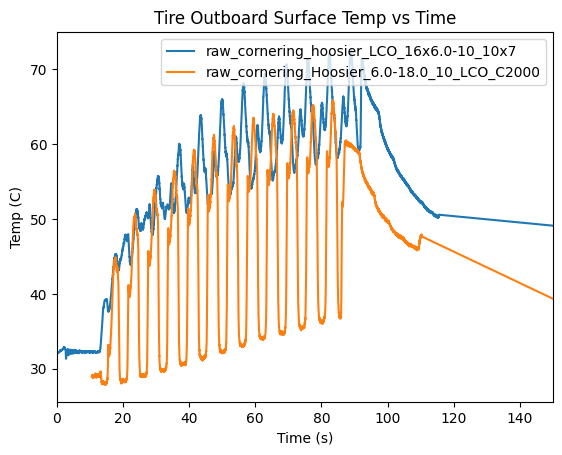

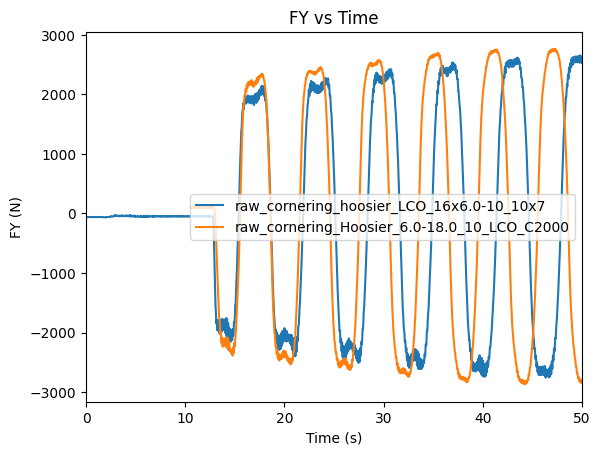

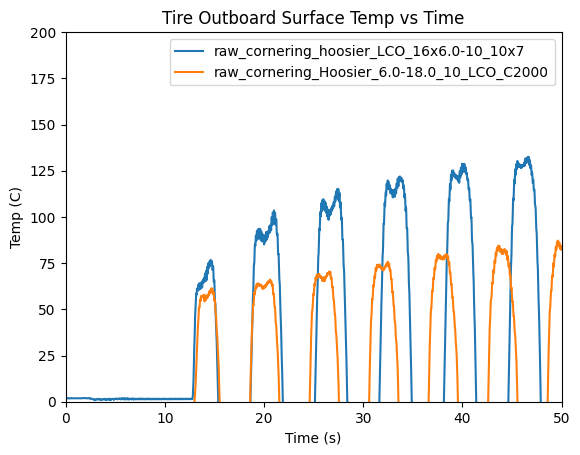

In [ ]:
tire_lst = []

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 150])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["FY"])
    tire_lst.append(name)

    plt.title(f"FY vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("FY (N)")

plt.legend(tire_lst)
plt.xlim([0, 50])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"] * tire["lat"]["FY"] / tire["lat"]["FZ"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])
plt.ylim([0, 200])

(0.0, 200.0)

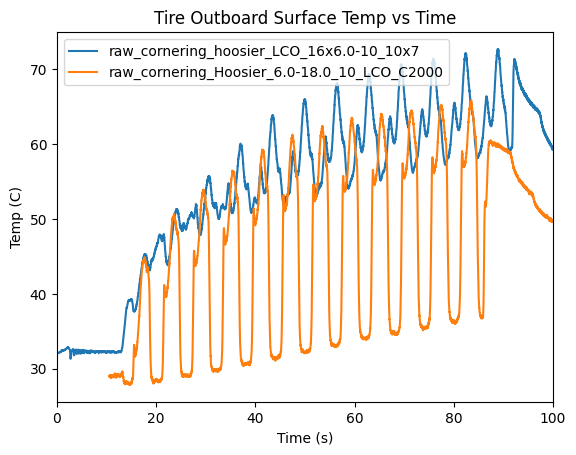

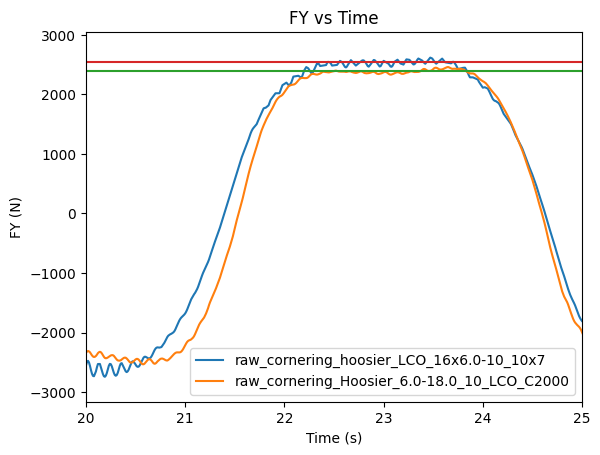

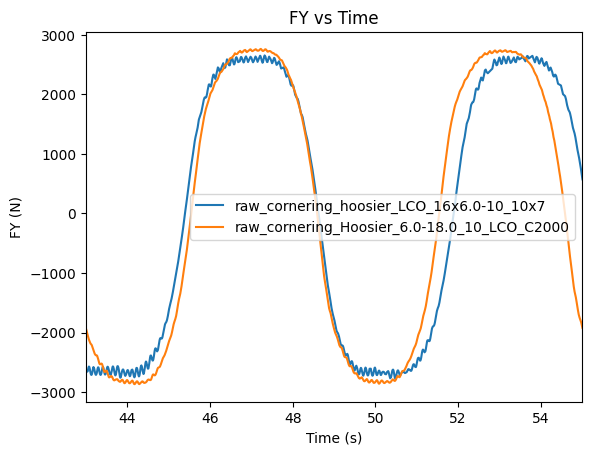

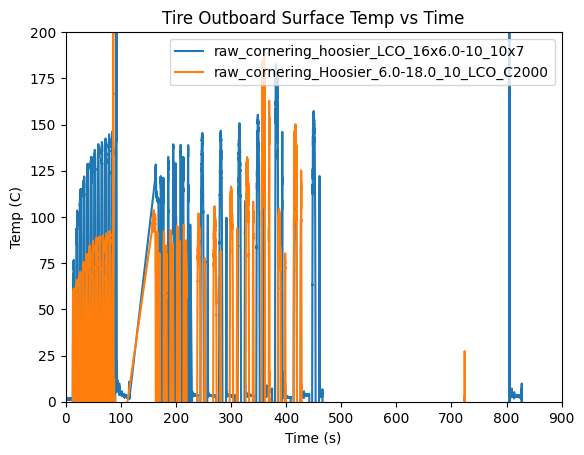

In [ ]:
tire_lst = []

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 100])

tire_lst = []
plt.figure()
for name, tire in round6_tires.items():
    if name == "raw_cornering_hoosier_LCO_16x6.0-10_10x7":
        plt.plot(tire["lat"]["ET"] - 20, tire["lat"]["FY"])
        tire_lst.append(name)
    
    else:
        plt.plot(tire["lat"]["ET"], tire["lat"]["FY"])
        tire_lst.append(name)

    plt.title(f"FY vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("FY (N)")

plt.legend(tire_lst)
plt.plot(tire["lat"]["ET"], [2400 for x in range(len(tire["lat"]["ET"]))])
plt.plot(tire["lat"]["ET"], [2550 for x in range(len(tire["lat"]["ET"]))])
plt.xlim([20, 25])

tire_lst = []
plt.figure()
for name, tire in round6_tires.items():
    if name == "raw_cornering_hoosier_LCO_16x6.0-10_10x7":
        plt.plot(tire["lat"]["ET"] - 2.5, tire["lat"]["FY"])
        tire_lst.append(name)
    
    else:
        plt.plot(tire["lat"]["ET"], tire["lat"]["FY"])
        tire_lst.append(name)

    plt.title(f"FY vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("FY (N)")

plt.legend(tire_lst)
plt.xlim([43, 55])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"] * tire["lat"]["FY"] / tire["lat"]["FZ"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 900])
plt.ylim([0, 200])

### FY from initial tire warmup

In [ ]:
round6_tires = {
"raw_cornering_hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None},
"raw_cornering_Hoosier_6.0-18.0_10_LCO_C2000":{"long":None, "lat":None}
}

In [ ]:
for name, tire in round6_tires.items():

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber)]

    except:
        print("Error getting lateral data for {0}".format(name))

(0.0, 200.0)

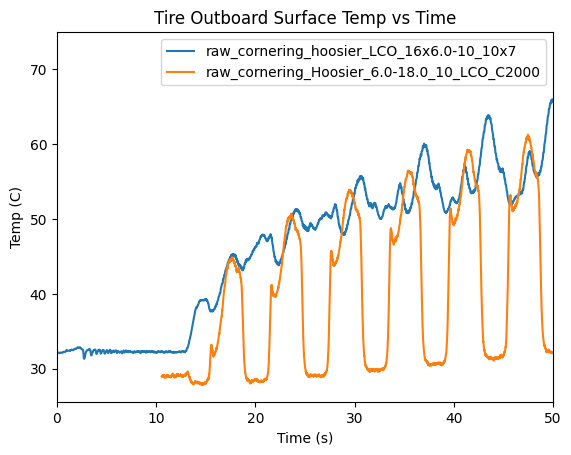

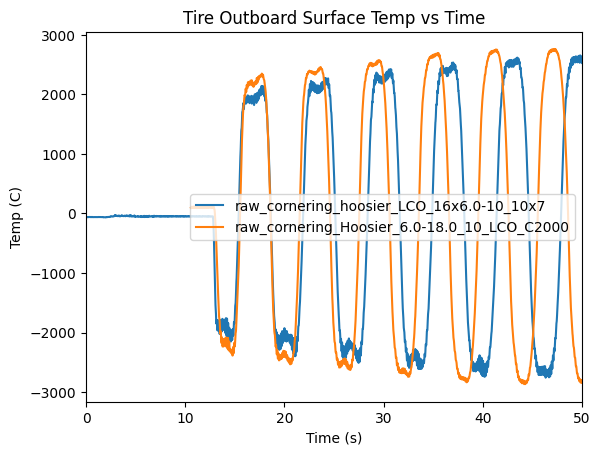

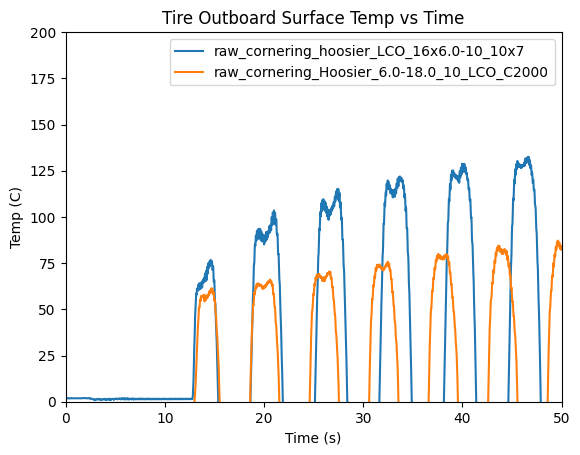

In [ ]:
tire_lst = []

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["FY"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"] * tire["lat"]["FY"] / tire["lat"]["FZ"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])
plt.ylim([0, 200])

In [ ]:
round6_tires = {
"raw_cornering_hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None},
"raw_cornering_Hoosier_6.0-18.0_10_LCO_C2000":{"long":None, "lat":None}
}

In [ ]:
for name, tire in round6_tires.items():

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber)]

    except:
        print("Error getting lateral data for {0}".format(name))

(0.0, 200.0)

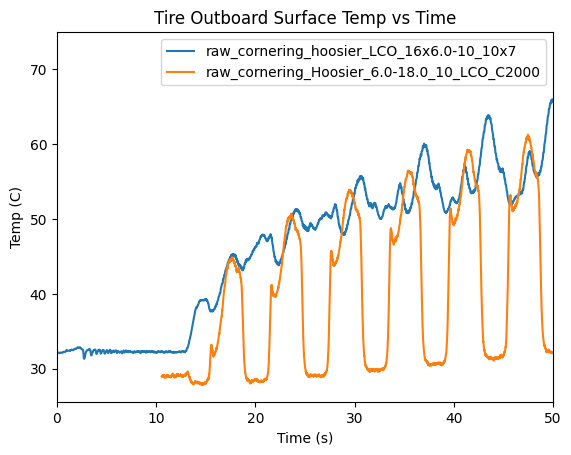

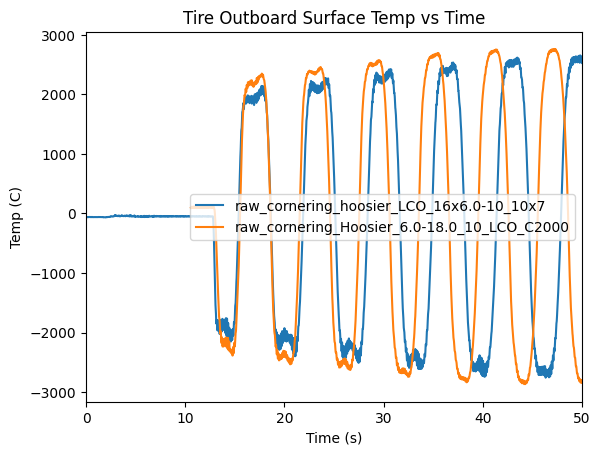

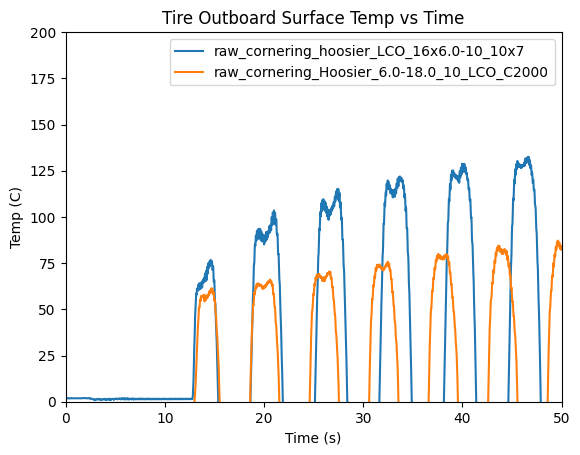

In [ ]:
tire_lst = []

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["FY"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])

plt.figure()
for name, tire in round6_tires.items():
    plt.plot(tire["lat"]["ET"], tire["lat"]["TSTO"] * tire["lat"]["FY"] / tire["lat"]["FZ"])
    tire_lst.append(name)

    plt.title(f"Tire Outboard Surface Temp vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Temp (C)")

plt.legend(tire_lst)
plt.xlim([0, 50])
plt.ylim([0, 200])

(342.0, 344.0)

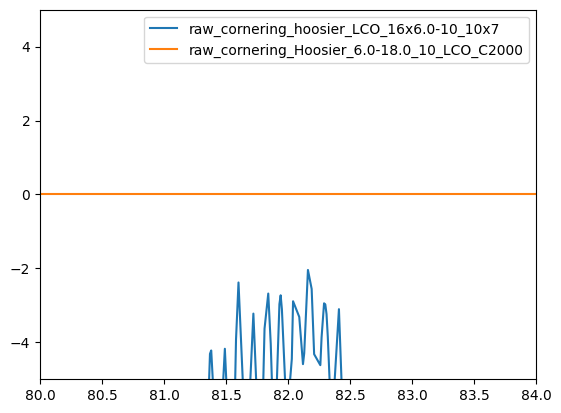

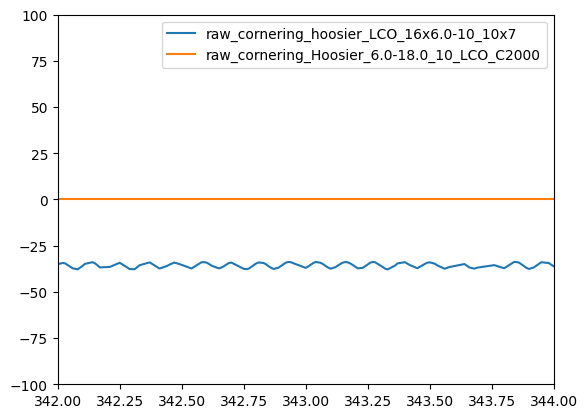

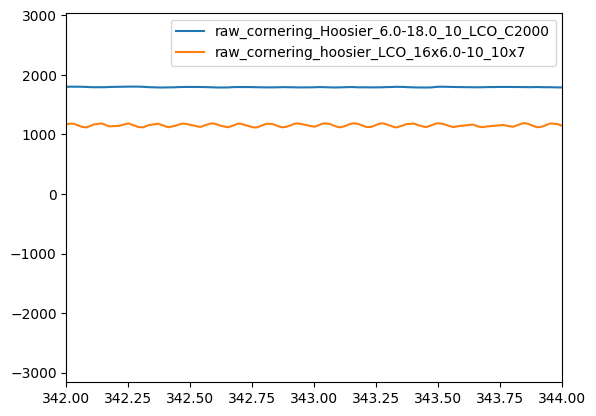

In [ ]:
tire_lst = []

count = 0

for name, tire in round6_tires.items():
    if count == 0:
        tire1_temp = tire["lat"]["TSTO"]
        tire1_temp2 = tire["lat"]["TSTO"]
        tire1_FY = tire["lat"]["FY"]
        tire1_FY2 = tire["lat"]["FY"]
        tire1_time = tire["lat"]["ET"]
    
    else:
        tire2_temp = tire["lat"]["TSTO"]
        tire2_temp2 = tire["lat"]["TSTO"]
        tire2_FY = tire["lat"]["FY"]
        tire2_FY2 = tire["lat"]["FY"]
        tire2_time = tire["lat"]["ET"]
        tire2_time2 = tire["lat"]["ET"]

    tire_lst.append(name)

    count += 1

tire2_temp = tire2_temp[:len(tire1_temp)]
tire2_FY2 = tire2_FY2[:len(tire1_FY)]

percent_diff = []

for tire1_FY, tire2_FY in zip(tire1_FY, tire2_FY):
    percent_diff.append((tire1_FY - tire2_FY) / (tire2_FY + 0.00001) * 100)

plt.plot(tire1_time, percent_diff)
plt.plot(tire1_time, [0 for x in range(len(tire1_time))])
plt.xlim([80, 84])
plt.ylim([-5, 5])
plt.legend(tire_lst)

plt.figure()

plt.plot(tire1_time, percent_diff)
plt.plot(tire1_time, [0 for x in range(len(tire1_time))])
plt.xlim([342, 344])
plt.ylim([-100, 100])
plt.legend(tire_lst)

plt.figure()

plt.plot(tire1_time, tire2_FY2)
plt.plot(tire1_time, tire1_FY2[:len(tire2_time2)])
plt.legend(tire_lst[::-1])

plt.xlim([342, 344])
